In [1]:
from keras.models import Sequential
from keras.layers import Conv2D

from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
img = Image.open('unnamed.jpg')

In [3]:
image_file = img.convert('LA')
grey = np.asarray(image_file)[:,:,0]

color = np.asarray(img)

grey = grey / 255.
color = color / 255.

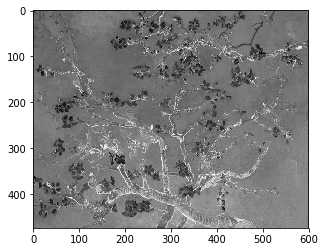

In [4]:
plt.imshow(np.asarray(image_file)[:,:,0], cmap='Greys')

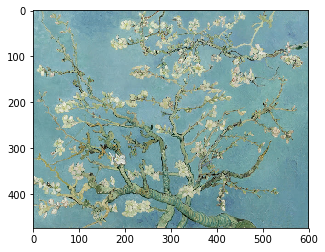

In [5]:
plt.imshow(color)

In [6]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), padding='same', input_shape=grey.shape + (1,)))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(3, kernel_size=(3, 3), padding='same', activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 474, 600, 16)      160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 474, 600, 32)      4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 474, 600, 32)      9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 474, 600, 32)      9248      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 474, 600, 32)      9248      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 474, 600, 3)       867       
Total params: 33,411
Trainable params: 33,411
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
grey = np.expand_dims(grey, -1)
grey = np.expand_dims(grey, 0)

colors = np.expand_dims(color, 0)

In [11]:
greys = np.repeat(grey, 100, axis=0)
colors = np.repeat(colors, 100, axis=0)

In [12]:
colors.shape

(100, 474, 600, 3)

In [13]:
greys.shape

(100, 474, 600, 1)

In [14]:
model.fit(greys, colors, batch_size=8, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100


KeyboardInterrupt: 

In [ ]:
output = model.predict(greys)

In [ ]:
plt.imshow(output[0])

In [ ]:
plt.imshow(grey[:,:, 0], cmap='Greys')

In [15]:
from keras.preprocessing.text import Tokenizer
# define 5 documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!']
# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(docs)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(docs, mode='count')
print(encoded_docs)

OrderedDict([('well', 1), ('done', 1), ('good', 1), ('work', 2), ('great', 1), ('effort', 1), ('nice', 1), ('excellent', 1)])
5
{'work': 1, 'well': 2, 'done': 3, 'good': 4, 'great': 5, 'effort': 6, 'nice': 7, 'excellent': 8}
defaultdict(<class 'int'>, {'well': 1, 'done': 1, 'work': 2, 'good': 1, 'effort': 1, 'great': 1, 'nice': 1, 'excellent': 1})
[[0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [16]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2D PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

ModuleNotFoundError: No module named 'gensim'